# Part (c): Analysis Of Variance (ANOVA)
### UE22CS342AA2 - Data Analytics
- Karthik Namboori - namkarthik2003@gmail.com


- `Analysis of Variance (ANOVA)` is a hypothesis testing procedure used for comparing means from several groups simultaneously.
- Using an one-way ANOVA, we test whether the mean values of an outcome variable for different levels of a factor are different. Using multiple two sample t-tests to simultaneously test group means will result in incorrect estimation of the Type-I error; ANOVA overcomes this issue.
- In two-way ANOVA, we check the impact of more than one factor simultaneously on several groups.


## About the Dataset.

- abhicure.ai, a leading company in LLM development, has performed a study to assess employees' productivity score based on factors such as the work setting they practice.
- The work setting could be `Coworking Space` (Working on site, in a corporate environment), `Home office` (Work from home) or `Hybrid` and the communication tools they use could be `Zoom`, `Slack` or `Email`.
- As a data analyst for abhicure.ai, your job is to study the scenario and answer the following questions.
- Use the dataset `productivity_data_owa.csv` for tasks requiring only work setting and dataset `productivity_data_twa.csv` for tasks requiring both, work setting and communication tool.


### Problems
    - Problem 1
    - Problem 2
    - Problem 3
    - Problem 4
    - Problem 5


*Snippet to install a package cleanly*
```
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
```

*Load the package*
```
library(tidyverse)
```

*Problem 1*

Does the data meet the normality assumption required for ANOVA? Verify for each group under the Work Setting using the Q-Q plot. Measure the skewness (if any) in each case. (2 points)
- As a bonus (not evaluated), do have a look at shapiro-wilk test from [here](https://www.geeksforgeeks.org/shapiro-wilk-test-in-r-programming/) to statistically infer normality! 

,Sl_No,RemoteWorkSetting,ProductivityScore
,<int>,<chr>,<dbl>
1,0,Hybrid,93.08691
2,1,Coworking space,95.43247
3,2,Hybrid,71.42055
4,3,Hybrid,70.34142
5,4,Home office,64.21400
6,5,Hybrid,59.74954


RemoteWorkSetting,Skewness
<chr>,<dbl>
Coworking space,-0.457795829
Home office,-0.007306435
Hybrid,-0.158586022


# A tibble: 3 × 2
  RemoteWorkSetting p_value
  <chr>               <dbl>
1 Coworking space    0.0808
2 Home office        0.755 
3 Hybrid             0.521 


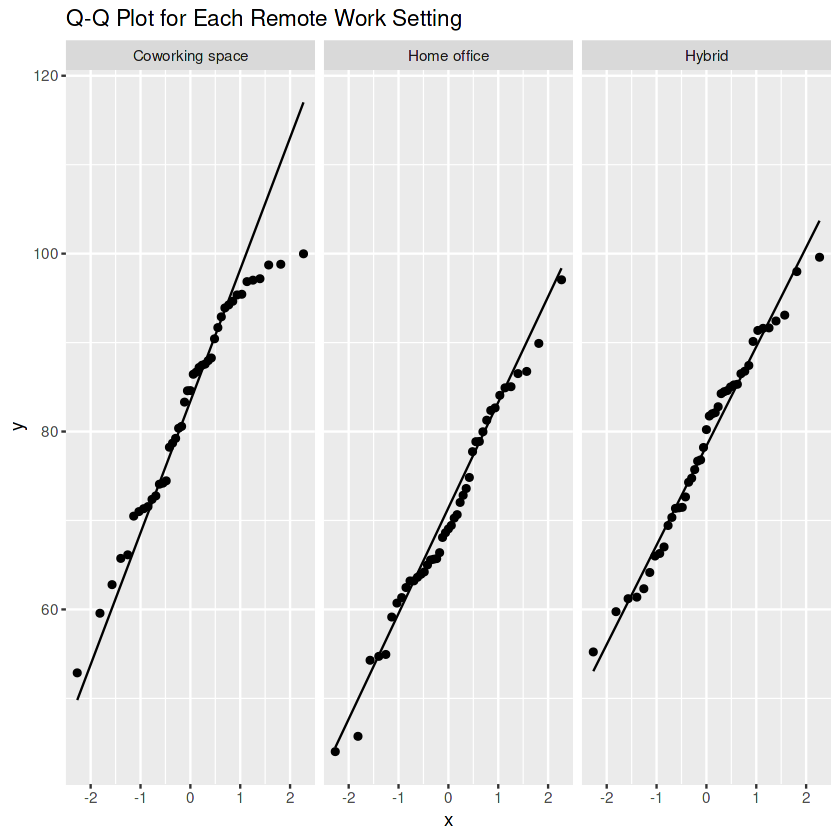

In [6]:
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
library(tidyverse)

data <- read.csv("/kaggle/input/anova-ws-c/productivity_data_owa.csv", header = TRUE)
head(data)

library(ggplot2)
data %>%
  group_by(RemoteWorkSetting) %>%
  ggplot(aes(sample = ProductivityScore)) + 
  stat_qq() + 
  stat_qq_line() + 
  facet_wrap(~RemoteWorkSetting) + 
  ggtitle("Q-Q Plot for Each Remote Work Setting")

if (!requireNamespace("e1071", quietly = TRUE)) {
    install.packages("e1071")
}
library(e1071)
data %>%
  group_by(RemoteWorkSetting) %>%
  summarise(Skewness = skewness(ProductivityScore, na.rm = TRUE))

shapiro_test_results <- data %>%
  group_by(RemoteWorkSetting) %>%
  summarise(p_value = shapiro.test(ProductivityScore)$p.value)
print(shapiro_test_results)

**Skewness:**

All values are close to zero, indicating approximately symmetric distributions.

**Shapiro-Wilk Test p-values:**

All p-values are greater than 0.05, suggesting no significant deviation from normality.

**Answer -**

The data for each remote work setting meets the normality assumption required for ANOVA.

*Problem 2*

One wants to determine if the work setting has any effect on productivity. How can this be inferred using statistical methods? Name the method and mathematically arrive at this inference. Can one use t-test for the same? Why/ Why not? *(NOTE: Assume the significance level to be 0.05)* (2 + 1 points)


In [7]:
anova_result <- aov(ProductivityScore ~ RemoteWorkSetting, data = data)
summary(anova_result)

                   Df Sum Sq Mean Sq F value   Pr(>F)    
RemoteWorkSetting   2   3344  1672.1    12.5 1.12e-05 ***
Residuals         126  16856   133.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**We cannot use T-test.
Why?**

t-Test Limitation: A t-test compares the means between two groups. Since there are more than two work settings (Coworking space, Home office, Hybrid), a t-test is not suitable for this scenario.

Solution -

Using ANOVA : One-way ANOVA can handle more than two groups simultaneously, making it the appropriate choice for comparing means across multiple work settings.

From the ANOVA output : Pr(>F) (p-value): 1.12e-05

p-value < 0.05: The p-value is significantly less than the significance level (0.05).

There is a statistically significant effect of the work setting on productivity.

*To check for homogenity of variance, do have look [here](https://www.geeksforgeeks.org/levenes-test-in-r-programming/) at Levene's test*

## Post-hoc tests.
- When you use ANOVA to test the equality of at least three group means, statistically significant results may indicate that not all of the group means are equal. However, ANOVA results do not identify which particular differences between pairs of means are significant. 
- In such a case, we use post-hoc tests, also known as multiple comparisons.
- There are a variety of post hoc tests you can choose from, but `Tukey’s method` is the most common for comparing all possible group pairings.
- If the adjusted p-value between a pair of groups is less than 0.05, then we can assume statistical significance between the pair.
- You can learn more [here](https://statisticsbyjim.com/anova/post-hoc-tests-anova/).

*Problem 3*

Perform Tukey's Test to infer which pairs have means statistically significant from one other and which dont. (State your answer for significance level at 0.05 and 0.02). Which pair of categories show a *clear* difference in productivity?  (1 + 1 points)

In [8]:
anova_result <- aov(ProductivityScore ~ RemoteWorkSetting, data = data)
tukey_result <- TukeyHSD(anova_result)
print(tukey_result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = ProductivityScore ~ RemoteWorkSetting, data = data)

$RemoteWorkSetting
                                  diff        lwr       upr     p adj
Home office-Coworking space -12.288336 -18.204391 -6.372280 0.0000077
Hybrid-Coworking space       -4.298428 -10.214484  1.617627 0.2005429
Hybrid-Home office            7.989907   2.073852 13.905963 0.0048685



**Tukey's Test Results**

* Home office vs. Coworking space: p-value: 0.0000077 (significant at both 0.05 and 0.02)
* Hybrid vs. Coworking space: p-value: 0.2005 (not significant at 0.05)
* Hybrid vs. Home office: p-value: 0.0049 (significant at 0.05, not 0.02)

Clear Difference: Home office vs. Coworking space shows a clear difference in productivity at both significance levels.

# Two-way ANOVA

- Two-way ANOVA is used when the response variable is influenced by several factors.
- Consider the `productivity_twa.csv`, where in now the productivity of the employees is influenced by both, the `work setting` and the `communication tool`. 
- The work setting could be `Coworking Space` (Working on site, in a corporate environment), `Home office` (Work from home) or `Hybrid` and the communication tools they use could be `Zoom`, `Slack` or `Email`.

*Problem 4*

Does the interaction between different work settings and communication tools significantly affect employee productivity scores? Justify your answer. (2 points)

In [11]:
data <- read.csv("/kaggle/input/anova-ws-c/productivity_data_twa.csv", header = TRUE)
head(data)
anova_result <- aov(ProductivityScore ~ RemoteWorkSetting * CommunicationTool, data = data)
summary(anova_result)

,employee_no,RemoteWorkSetting,CommunicationTool,ProductivityScore
,<int>,<chr>,<chr>,<dbl>
1,1,Hybrid,Zoom,93.08691
2,2,Coworking space,Zoom,98.87113
3,3,Hybrid,Email,81.42055
4,4,Hybrid,Slack,80.34142
5,5,Home office,Email,64.21400
6,6,Hybrid,Slack,59.74954


                                     Df Sum Sq Mean Sq F value   Pr(>F)    
RemoteWorkSetting                     2   3253  1626.5  13.271 6.27e-06 ***
CommunicationTool                     2    673   336.5   2.746   0.0683 .  
RemoteWorkSetting:CommunicationTool   4    854   213.4   1.742   0.1454    
Residuals                           119  14584   122.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**Two-Way ANOVA**

* RemoteWorkSetting: Significant effect on productivity (p-value < 0.05).

* CommunicationTool: Marginally significant (p-value = 0.0683), but not significant at the 0.05 level.

* Interaction (Work Setting * Communication Tool): Not significant (p-value = 0.1454).

* Work setting significantly affects productivity, but the communication tool and its interaction with work setting do not.

*Problem 5*

Having learnt from the above study, which pair of work setting and communication tool must be adopted by the management for the employees? Based on the study, would you, as an entrepreneur adopt the same strategy for your company? Justify your answer. What would the name of your company be? 👀 (1 point)


**My Recommendation**

Adopt the work setting with the highest productivity impact from the study.
Will choose the communication tool based on team needs, as its impact was less significant.

**Justification**

For Management, I will Implement the effective work setting for better productivity.

As an Entrepreneur, I will follow the study’s findings but consider additional factors.

*My suggested company name : "EffiWork".*